In this assignment, students will be using the K-nearest neighbors algorithm to predict
how many points NBA players scored in the 2013-2014 season.

A look at the data

Before we dive into the algorithm, let’s take a look at our data. Each row in the data
contains information on how a player performed in the 2013-2014 NBA season.

Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

Here are some selected columns from the data:

player - name of the player

pos - the position of the player

g - number of games the player was in

gs - number of games the player started

pts - total points the player scored

There are many more columns in the data, mostly containing information about average
player game performance over the course of the season. See this site for an explanation
of the rest of them.
We can read our dataset in and figure out which columns are present:



In [14]:
#importing libraries

import pandas 
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# loading csv file
with open('nba_2013.csv','r') as csvfile:
    nba = pandas.read_csv(csvfile)
    
#droping umimportant columns    
nba.drop(columns=['player','pos','bref_team_id','season','season_end'],axis=1,inplace=True)


X=nba.iloc[:,0:25].values
Y=nba.iloc[:,25].values

#filling missing values
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
X=imputer.fit_transform(X)

#split data into training and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
y_train=Y_train.ravel()
y_test=Y_test.ravel()

rmse_val=[] #to store rmse values for different K
for K in range(10):
    K_value=K+1
    model=KNeighborsRegressor(n_neighbors=K_value,weights='uniform',algorithm='auto')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    error=sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for K=',K_value,'is',error)

RMSE value for K= 1 is 93.50563324354239
RMSE value for K= 2 is 92.08445336604946
RMSE value for K= 3 is 87.23943798666912
RMSE value for K= 4 is 83.35868953318338
RMSE value for K= 5 is 79.84875012516929
RMSE value for K= 6 is 80.53674942324675
RMSE value for K= 7 is 80.21229572605384
RMSE value for K= 8 is 81.5920327362573
RMSE value for K= 9 is 82.57342566345551
RMSE value for K= 10 is 81.97995339484336


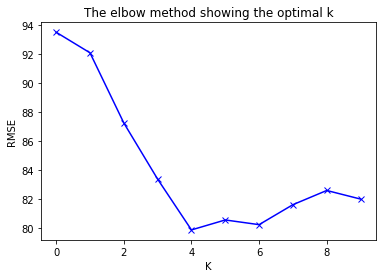

In [15]:
 #ploting the rmse values against k values
K=range(10)    
plt.plot(K,rmse_val,'bx-')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('The elbow method showing the optimal k')
plt.show()

As we discussed,when we take K=1,we get a very high RMSE value .The RMSE value decreases as we increase k_value.
we can safely say that k=4 will give us the best result inthis case